<a href="https://colab.research.google.com/github/Therayz1/-PYNB/blob/main/Water_Quality_Explanatory_Data_Analysis_origin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Water Quality Explanatory Data Analysis

## Ne yapacağız
* Bivariate and Multivariate Data Analysis
* Correlation analysis
* preprocessing işlemleri, missing value, train test split and nrmalization
* <b>Modelling: <b/> Decision Tree and Random Forest Classifiers<br>
* Visualize Decision Tree
* Random Forest Hyperparameter Tuning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier # ensemble yöntemleri topluluk öğrenme yöntemleridir, içerisinde birden fazla ml algoritması bulundurabilir
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, confusion_matrix
from sklearn import tree

In [2]:
ds = pd.read_csv('/content/water_potability.csv')
df= ds.copy()
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [3]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


potability yani içilebilirlik diğer 9 feature'a göre bağımlıdır

In [5]:
d= pd.DataFrame(df['Potability'].value_counts())
d

,count
Potability,
0,1998
1,1278


In [6]:
# Pie chart'ı oluştur
fig = px.pie(d, values='count', names=['No potability', 'potability'], hole=0.4, opacity=0.8,
             labels={"Potability": "Potability", "Count": "Number of samples"})

fig.update_layout(title_text="Pie chart of potability feature")
fig.update_traces(textposition='outside', textinfo='percent+label')
fig.show()

# KORELASYON ANALİZİ

In [7]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


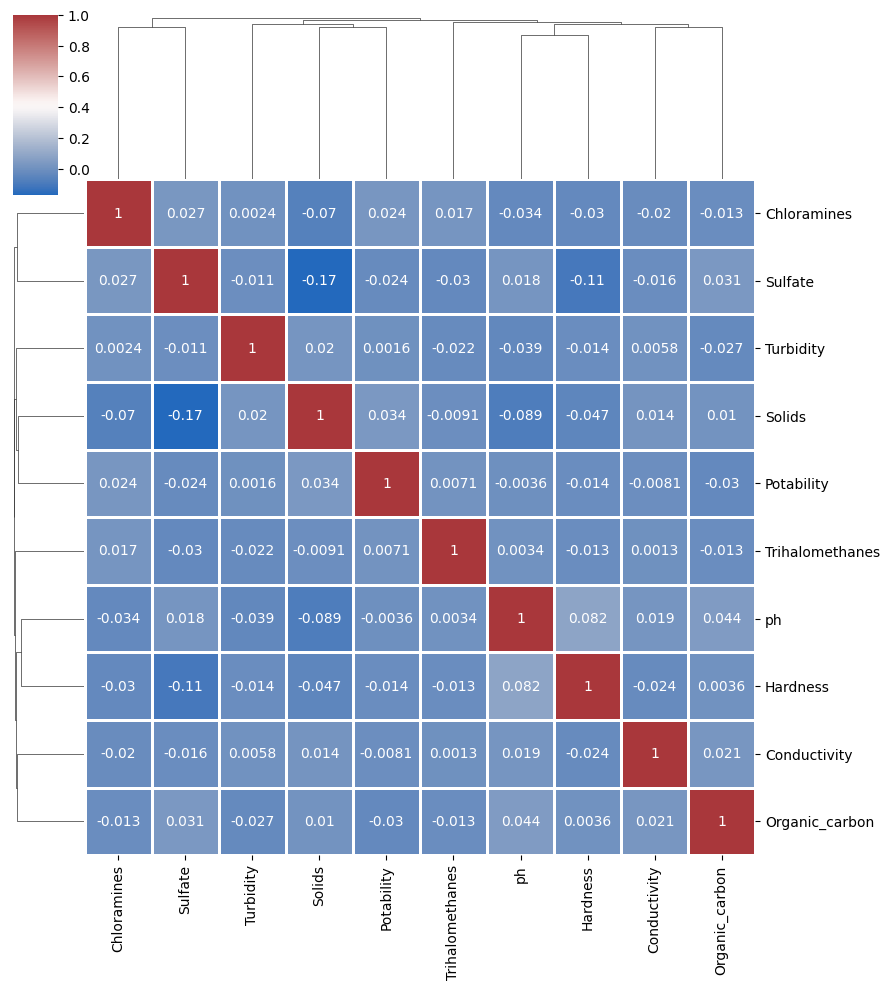

In [8]:
sns.clustermap(df.corr(),cmap='vlag',dendrogram_ratio=(0.1,0.2), annot=True, linewidths=.8, figsize=(9, 10))
plt.show()

# FEATURE (ÖZELLİK) DAĞILIMI

In [9]:
non_potable = df.query('Potability == 0')
potable = df.query('Potability == 1')

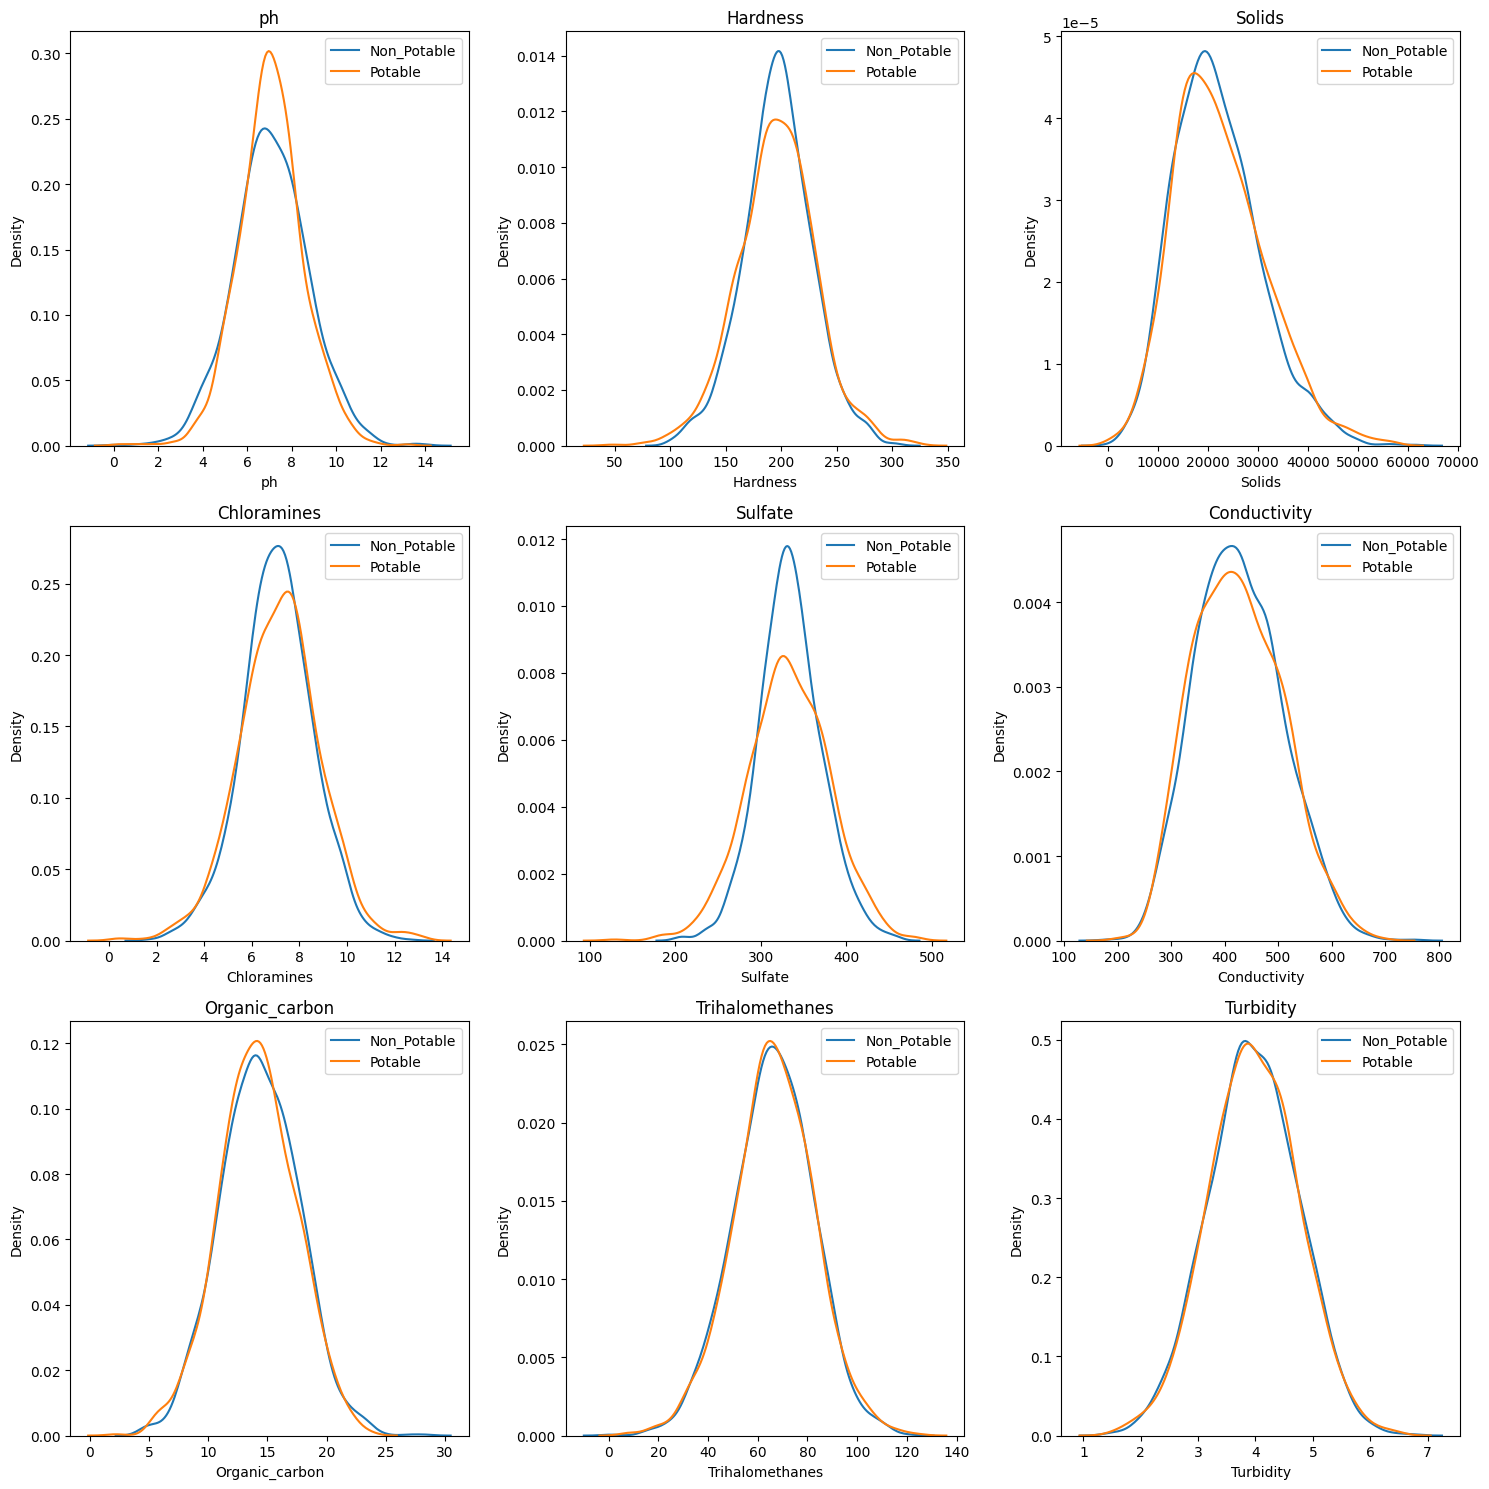

In [10]:
plt.figure(figsize=(15,15))
for ax, col in enumerate(df.columns[:9]):
    plt.subplot(3,3,ax+1)
    plt.title(col)
    sns.kdeplot(x=non_potable[col], label="Non_Potable")
    sns.kdeplot(x=potable[col], label="Potable")
    plt.legend()
plt.tight_layout()
plt.show()

# veri ön işleme (data preprocessing) eksik veri (missing value) sorunu

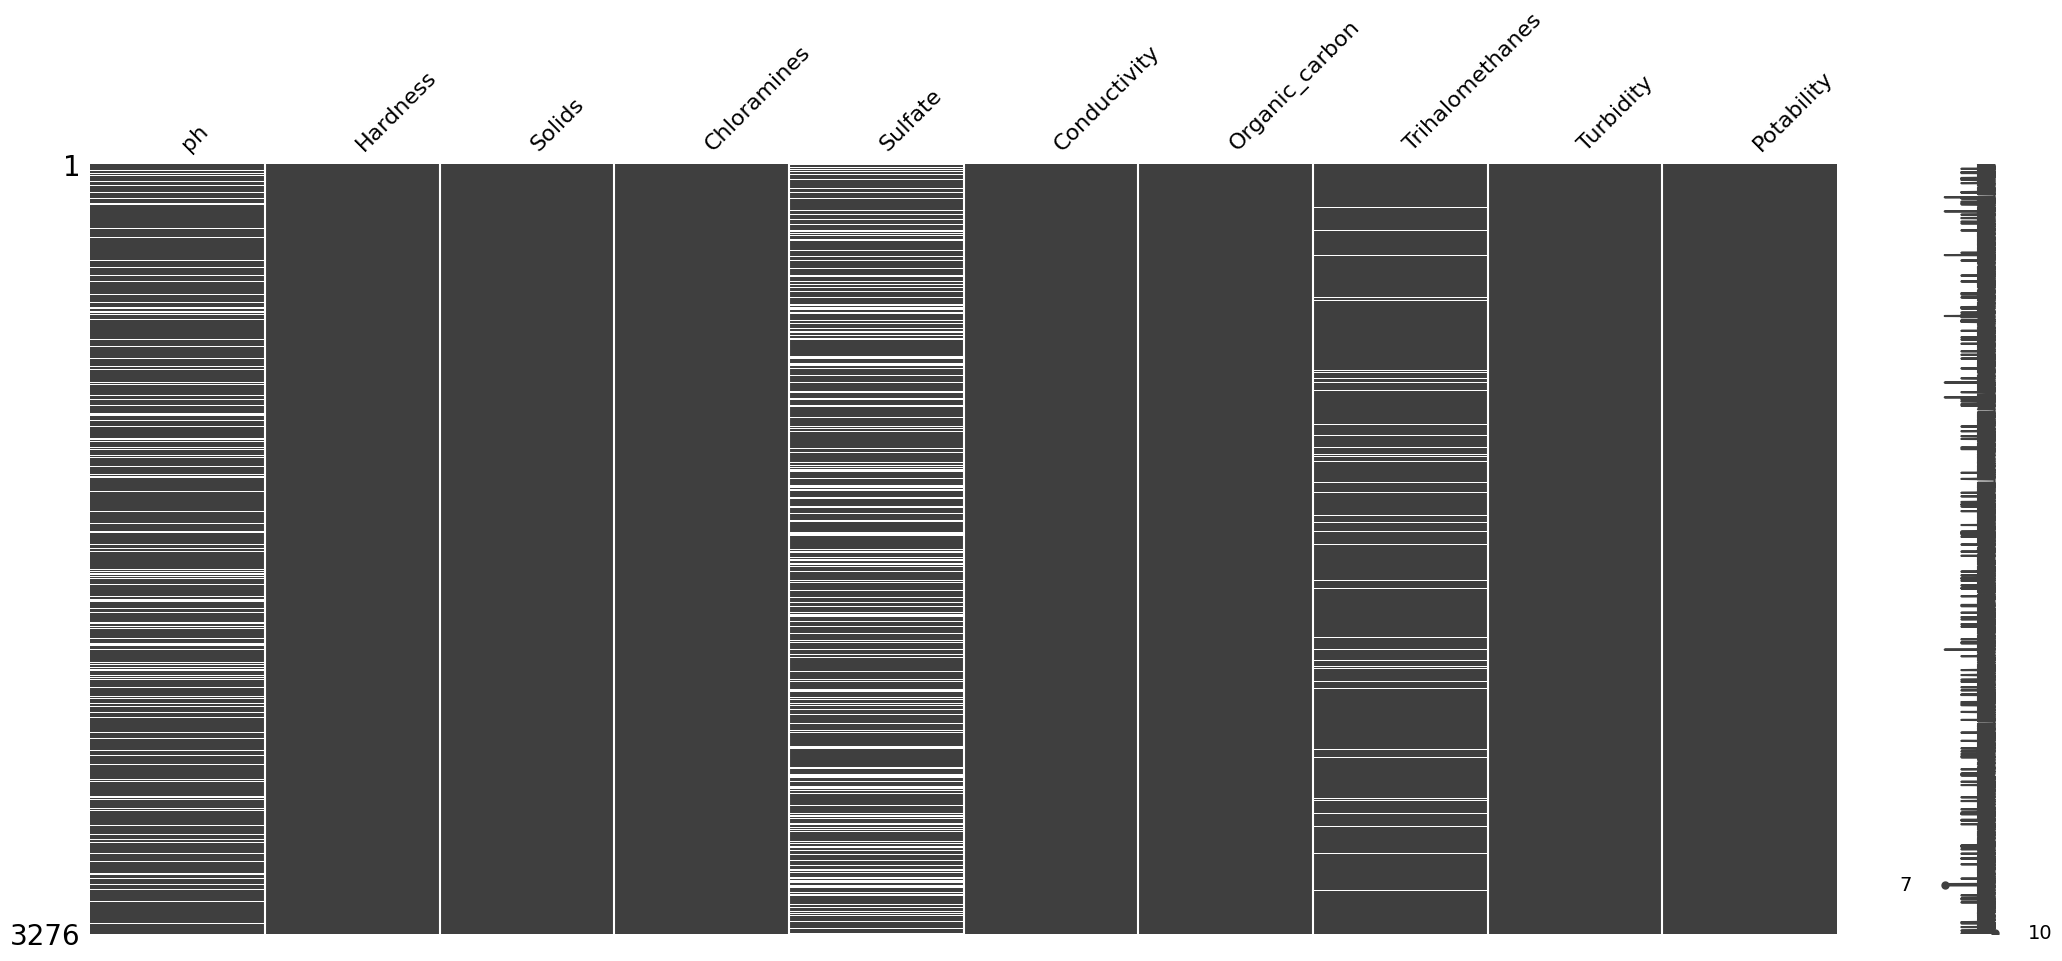

In [11]:
msno.matrix(df)
plt.show()

In [12]:
df.isnull().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


In [13]:
df["ph"].fillna(df["ph"].mean(), inplace=True)
df["Sulfate"].fillna(df["Sulfate"].mean(), inplace=True)
df["Trihalomethanes"].fillna(df["Trihalomethanes"].mean(), inplace=True)

In [14]:
df.isnull().sum()

,0
ph,0
Hardness,0
Solids,0
Chloramines,0
Sulfate,0
Conductivity,0
Organic_carbon,0
Trihalomethanes,0
Turbidity,0
Potability,0


#  Ön İşleme: Eğitim-Test Veri Seti Bölmesi ve Normalleştirme

In [15]:
X = df.drop('Potability', axis=1).values
y = df['Potability'].values

In [16]:
X

array([[7.08079450e+00, 2.04890455e+02, 2.07913190e+04, ...,
        1.03797831e+01, 8.69909705e+01, 2.96313538e+00],
       [3.71608008e+00, 1.29422921e+02, 1.86300579e+04, ...,
        1.51800131e+01, 5.63290763e+01, 4.50065627e+00],
       [8.09912419e+00, 2.24236259e+02, 1.99095417e+04, ...,
        1.68686369e+01, 6.64200925e+01, 3.05593375e+00],
       ...,
       [9.41951032e+00, 1.75762646e+02, 3.31555782e+04, ...,
        1.10390697e+01, 6.98454003e+01, 3.29887550e+00],
       [5.12676292e+00, 2.30603758e+02, 1.19838694e+04, ...,
        1.11689462e+01, 7.74882131e+01, 4.70865847e+00],
       [7.87467136e+00, 1.95102299e+02, 1.74041771e+04, ...,
        1.61403676e+01, 7.86984463e+01, 2.30914906e+00]])

In [17]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (2293, 9)
y_train shape: (2293,)
X_test shape: (983, 9)
y_test shape: (983,)


In [19]:
#min_max normalization---> veri seti içerisindeki değerleri 0-1 arasına sıkıştırıyoruz
X_train_max = np.max(X_train, axis=0)
X_train_min = np.min(X_train, axis=0)
X_train = (X_train - X_train_min) / (X_train_max - X_train_min)
X_test = (X_test - X_train_min) / (X_train_max - X_train_min)



# Modelleme: Karar Ağacı ve Rastgele Orman Sınıflandırıcıları

In [20]:
models = [('Decision Tree', DecisionTreeClassifier(max_depth=3)), ('Random Forest', RandomForestClassifier())]

In [21]:
models

[('Decision Tree', DecisionTreeClassifier(max_depth=3)),
 ('Random Forest', RandomForestClassifier())]

In [27]:
from sklearn.metrics import confusion_matrix, precision_score

final_results = []
cm_list = []  # Renamed to avoid conflict
for name, model in models:
    model.fit(X_train, y_train)
    model_result = model.predict(X_test)
    score = precision_score(y_test, model_result)
    cm = confusion_matrix(y_test, model_result)  # Use sklearn's confusion_matrix function

# Display the results
    final_results.append((name, score))
    cm_list.append((name,cm))
final_results

[('Decision Tree', 0.5652173913043478), ('Random Forest', 0.6180904522613065)]

In [28]:
cm_list

[('Decision Tree',
  array([[515,  80],
         [284, 104]])),
 ('Random Forest',
  array([[519,  76],
         [265, 123]]))]

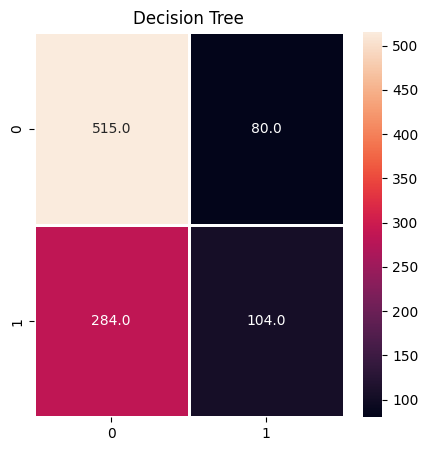

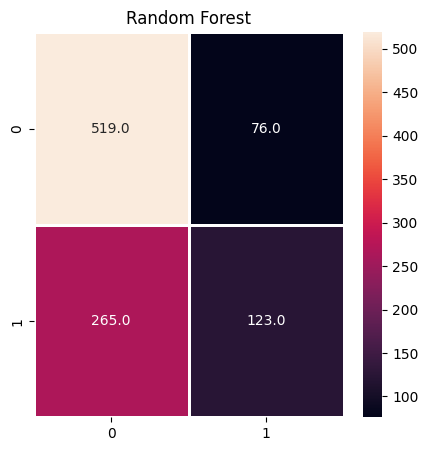

In [30]:
for name , i in cm_list:
  plt.figure(figsize=(5,5))
  sns.heatmap(i , annot=True , linewidths=0.8, fmt = '.1f')
  plt.title(name)
  plt.show()

# Karar Ağacını Görselleştirme

In [31]:
models

[('Decision Tree', DecisionTreeClassifier(max_depth=3)),
 ('Random Forest', RandomForestClassifier())]

In [34]:
dt_clf = models[0][1]
dt_clf

DecisionTreeClassifier(max_depth=3)

In [36]:
df.columns.tolist()[:-1]

['ph',
 'Hardness',
 'Solids',
 'Chloramines',
 'Sulfate',
 'Conductivity',
 'Organic_carbon',
 'Trihalomethanes',
 'Turbidity']

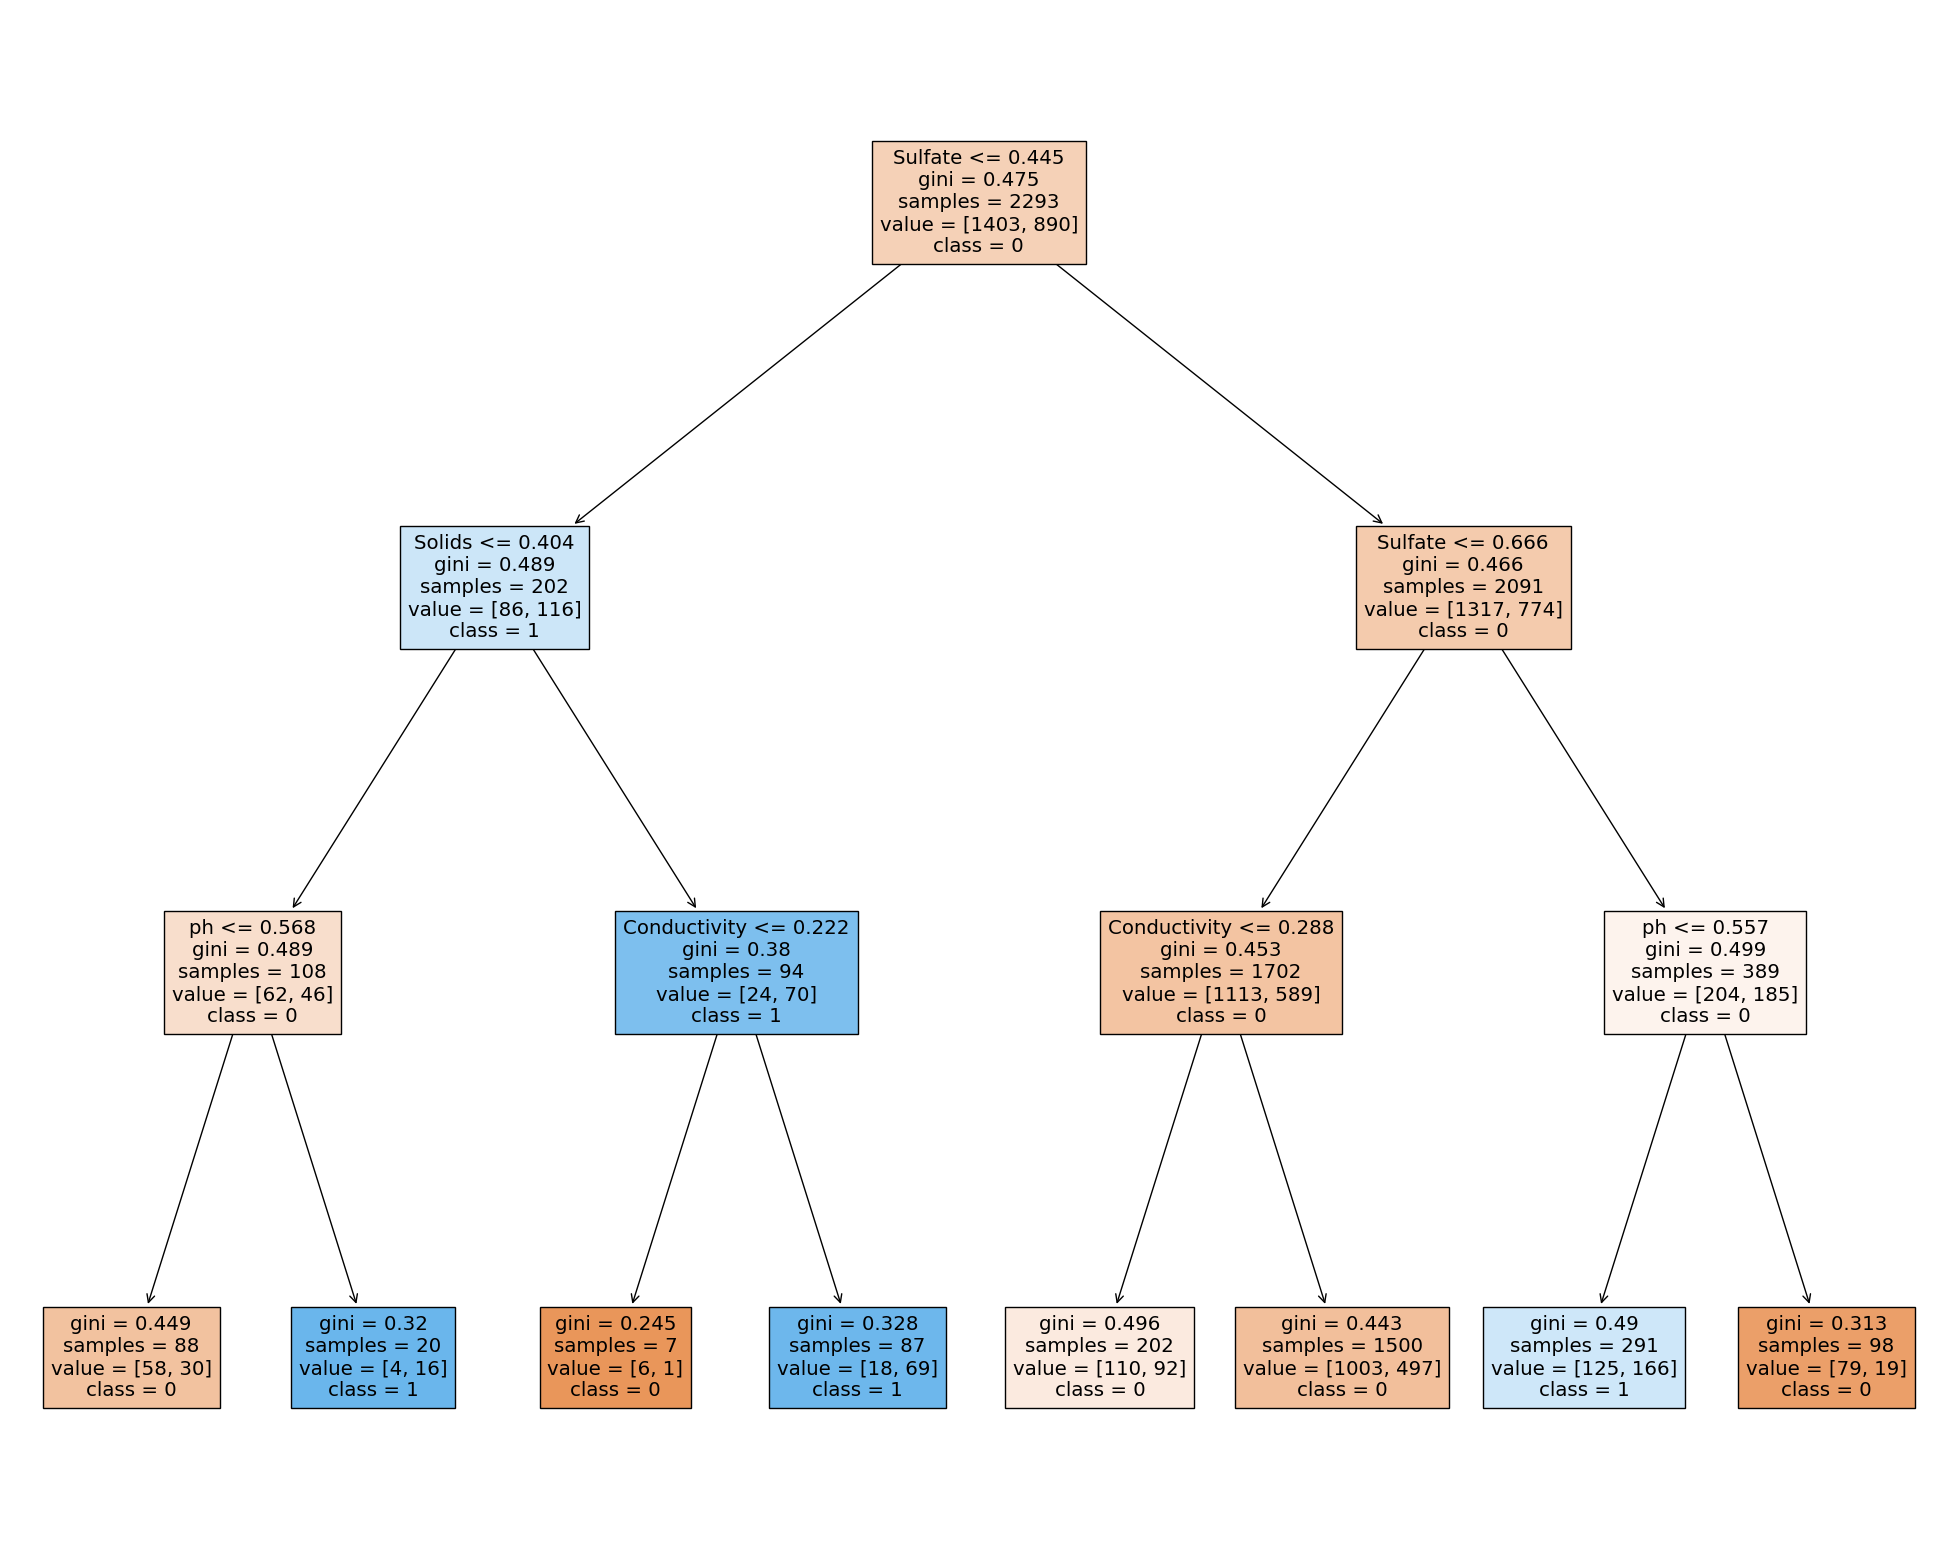

In [40]:
plt.figure(figsize=(25,20))
tree.plot_tree(dt_clf, feature_names=df.columns.tolist()[:-1], class_names=['0', '1'], filled=True)
plt.show()

# Rastgele Ormanlar Hiperparametre Optimizasyonu

In [42]:
from sklearn.ensemble import RandomForestClassifier

model_params = {
    "Random Forest": {
        "model": RandomForestClassifier(),  # Düzeltme: ':' yerine ',' kullanılmalı
        "params": {
            "n_estimators": [10, 50, 100],
            "max_features": ["auto", "sqrt", "log2"],
            "max_depth": list(range(1, 15, 3))
        }
    }
}

model_params


{'Random Forest': {'model': RandomForestClassifier(),
  'params': {'n_estimators': [10, 50, 100],
   'max_features': ['auto', 'sqrt', 'log2'],
   'max_depth': [1, 4, 7, 10, 13]}}}

In [43]:
# CROSS VALIDATION
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2)
scores=[]
for model_name, params in model_params.items():
  rs = RandomizedSearchCV(params["model"], params["params"], cv=cv,n_iter=10)
  rs.fit(X,y)
  scores.append([model_name, dict(rs.best_params_), rs.best_score_])
scores

[['Random Forest',
  {'n_estimators': 100, 'max_features': 'log2', 'max_depth': 13},
  0.6700244367901694]]